# Model Selection
---

In [37]:
import joblib as jl
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize

In [57]:
from sklearn.model_selection import train_test_split

# Compute accuracy, precision, recall and AUPRC for each model
def compute_metrics(model, data):
    X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, random_state=42
)
    y_train_pred = model.predict(X_train)
    y_train_true = y_train
    y_test_pred = model.predict(X_test)
    y_test_true = y_test
    accuracy_test = sk.metrics.accuracy_score(y_test_true, y_test_pred)
    accuracy_train = sk.metrics.accuracy_score(y_train_true, y_train_pred)
    #precision = sk.metrics.precision_score(y_true, y_pred)
    #recall = sk.metrics.recall_score(y_true, y_pred)
    #auprc = sk.metrics.average_precision_score(y_true, y_pred, average='micro')
    return accuracy_test, accuracy_train

### Models With Only Symptoms One Hot

In [58]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['log_reg_classic', 'log_reg_classic', 'MLP_classic']

log_reg = jl.load(path + mod_names[0] + '.joblib')
random_forest = jl.load(path + mod_names[1] + '.joblib')
MLP = jl.load(path + mod_names[2] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['symptoms']

symptoms = np.load(path + data_names[0] + '.npz')
data = np.concatenate((symptoms['X'], symptoms['y'].reshape(symptoms['y'].shape[0],1)), axis=1)

In [59]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy_test', 'accuracy_train']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_classic', metrics] = compute_metrics(log_reg, data)
#df.loc['random_forest_classic', metrics] = compute_metrics(random_forest, data)
df.loc['MLP_classic', metrics] = compute_metrics(MLP, data)

df

,accuracy_test,accuracy_train
log_reg_classic,0.832088,0.831728
log_reg_classic,0.832088,0.831728
MLP_classic,0.823603,0.825491


/tmp/ipykernel_1959/4060053886.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_test = cm.get_cmap('Blues')
/tmp/ipykernel_1959/4060053886.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_train = cm.get_cmap('Reds')


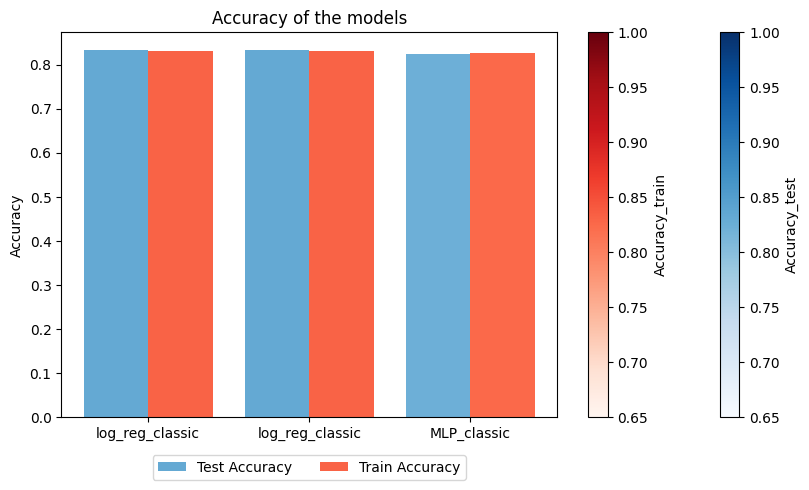

In [72]:
accuracy_test_values = df['accuracy_test']
accuracy_train_values = df['accuracy_train']

# Create a colormap
cmap_test = cm.get_cmap('Blues')
cmap_train = cm.get_cmap('Reds')

# Normalize the data to map it to the colormap
norm_test = Normalize(vmin=0.65, vmax=1)
norm_train = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors_test = [cmap_test(norm_test(value)) for value in accuracy_test_values]
colors_train = [cmap_train(norm_train(value)) for value in accuracy_train_values]

# Plot the bar chart with colored bars for accuracy_test

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
bars_test = ax.bar(np.arange(len(mod_names)) - 0.2, accuracy_test_values, width=0.4, color=colors_test, label='Test Accuracy')

# Plot the bar chart with colored bars for accuracy_train
bars_train = ax.bar(np.arange(len(mod_names)) + 0.2, accuracy_train_values, width=0.4, color=colors_train, label='Train Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')
ax.set_xticks(np.arange(len(mod_names)))
ax.set_xticklabels(mod_names)
ax.legend()

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_test, cmap=cmap_test), ax=ax)
cbar.set_label('Accuracy_test')
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_train, cmap=cmap_train), ax=ax)
cbar.set_label('Accuracy_train')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, shadow=False, ncol=2)

plt.show()

### Models With New Features

In [73]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['log_reg_mix', 'log_reg_mix', 'MLP_mix']


log_reg = jl.load(path + mod_names[0] + '.joblib')
random_forest = jl.load(path + mod_names[1] + '.joblib')
MLP = jl.load(path + mod_names[2] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['betweenness', 'community_count', 'community_size']

betweenness = np.load(path + data_names[0] + '.npz')
community_count = np.load(path + data_names[1] + '.npz')
community_size = np.load(path + data_names[2] + '.npz')

# Associate the features 
data_log_reg = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_random_forest = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_MLP = np.concatenate((community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)


In [74]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy_test', 'accuracy_train']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_mix', metrics] = compute_metrics(log_reg, data_log_reg)
#df.loc['random_forest_mix', metrics] = compute_metrics(random_forest, data_random_forest)
df.loc['MLP_mix', metrics] = compute_metrics(MLP, data_MLP)

df

,accuracy_test,accuracy_train
log_reg_mix,0.819452,0.822311
log_reg_mix,0.819452,0.822311
MLP_mix,0.772614,0.77278


/tmp/ipykernel_1959/745103858.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_test = cm.get_cmap('Blues')
/tmp/ipykernel_1959/745103858.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_train = cm.get_cmap('Reds')


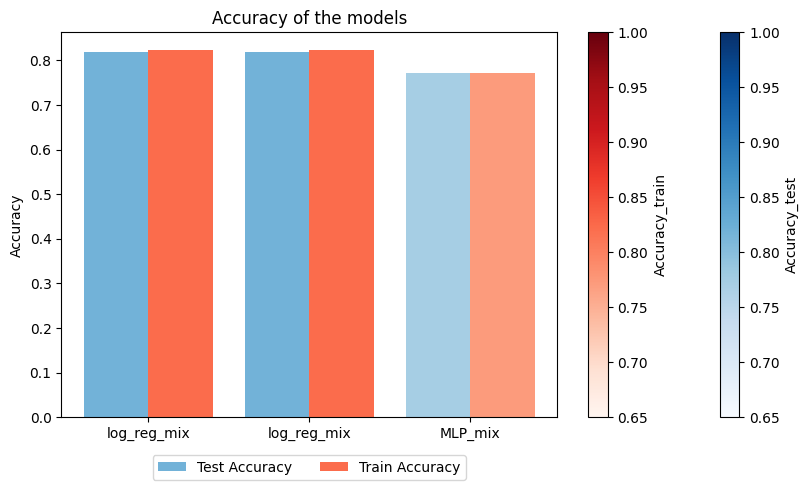

In [75]:
accuracy_test_values = df['accuracy_test']
accuracy_train_values = df['accuracy_train']

# Create a colormap
cmap_test = cm.get_cmap('Blues')
cmap_train = cm.get_cmap('Reds')

# Normalize the data to map it to the colormap
norm_test = Normalize(vmin=0.65, vmax=1)
norm_train = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors_test = [cmap_test(norm_test(value)) for value in accuracy_test_values]
colors_train = [cmap_train(norm_train(value)) for value in accuracy_train_values]

# Plot the bar chart with colored bars for accuracy_test

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
bars_test = ax.bar(np.arange(len(mod_names)) - 0.2, accuracy_test_values, width=0.4, color=colors_test, label='Test Accuracy')

# Plot the bar chart with colored bars for accuracy_train
bars_train = ax.bar(np.arange(len(mod_names)) + 0.2, accuracy_train_values, width=0.4, color=colors_train, label='Train Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')
ax.set_xticks(np.arange(len(mod_names)))
ax.set_xticklabels(mod_names)
ax.legend()

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_test, cmap=cmap_test), ax=ax)
cbar.set_label('Accuracy_test')
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_train, cmap=cmap_train), ax=ax)
cbar.set_label('Accuracy_train')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, shadow=False, ncol=2)

plt.show()

### Compare the two best models

In [77]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['MLP_classic', 'log_reg_mix']

classic = jl.load(path + mod_names[0] + '.joblib')
mix = jl.load(path + mod_names[1] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['symptoms', 'betweenness', 'community_count', 'community_size']

symptoms = np.load(path + data_names[0] + '.npz')
betweenness = np.load(path + data_names[1] + '.npz')
community_count = np.load(path + data_names[2] + '.npz')
community_size = np.load(path + data_names[3] + '.npz')

data_classic = np.concatenate((symptoms['X'], symptoms['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_mix = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)

In [78]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy_test', 'accuracy_train']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_mix', metrics] = compute_metrics(log_reg, data_log_reg)
#df.loc['random_forest', metrics] = compute_metrics(random_forest, data_random_forest)
df.loc['MLP_classic', metrics] = compute_metrics(MLP, data_MLP)

df

,accuracy_test,accuracy_train
MLP_classic,0.772614,0.77278
log_reg_mix,0.819452,0.822311


/tmp/ipykernel_1959/745103858.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_test = cm.get_cmap('Blues')
/tmp/ipykernel_1959/745103858.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_train = cm.get_cmap('Reds')


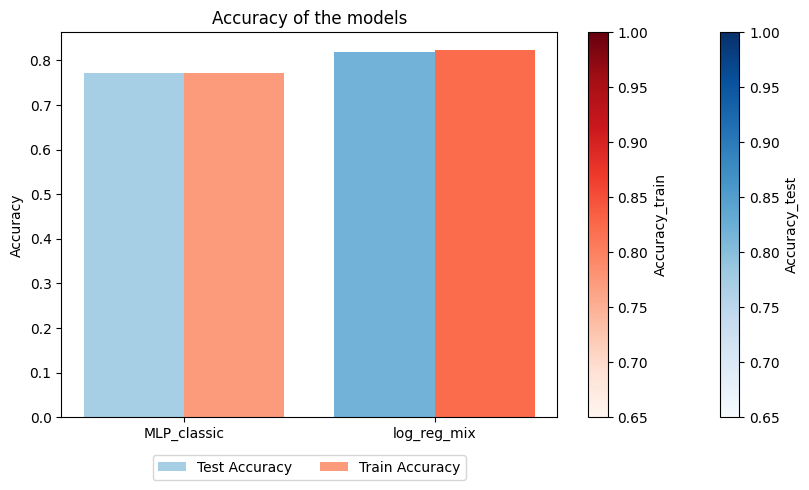

In [79]:
accuracy_test_values = df['accuracy_test']
accuracy_train_values = df['accuracy_train']

# Create a colormap
cmap_test = cm.get_cmap('Blues')
cmap_train = cm.get_cmap('Reds')

# Normalize the data to map it to the colormap
norm_test = Normalize(vmin=0.65, vmax=1)
norm_train = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors_test = [cmap_test(norm_test(value)) for value in accuracy_test_values]
colors_train = [cmap_train(norm_train(value)) for value in accuracy_train_values]

# Plot the bar chart with colored bars for accuracy_test

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
bars_test = ax.bar(np.arange(len(mod_names)) - 0.2, accuracy_test_values, width=0.4, color=colors_test, label='Test Accuracy')

# Plot the bar chart with colored bars for accuracy_train
bars_train = ax.bar(np.arange(len(mod_names)) + 0.2, accuracy_train_values, width=0.4, color=colors_train, label='Train Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')
ax.set_xticks(np.arange(len(mod_names)))
ax.set_xticklabels(mod_names)
ax.legend()

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_test, cmap=cmap_test), ax=ax)
cbar.set_label('Accuracy_test')
cbar = plt.colorbar(cm.ScalarMappable(norm=norm_train, cmap=cmap_train), ax=ax)
cbar.set_label('Accuracy_train')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, shadow=False, ncol=2)

plt.show()